In [2]:
import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.datasets import fashion_mnist
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

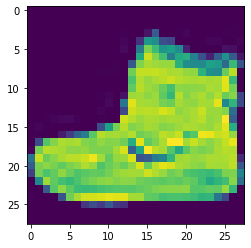

In [10]:
plt.imshow(train_data[0])
plt.show()

In [11]:
class_names = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

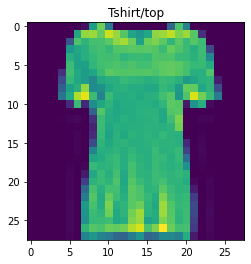

In [15]:
plt.imshow(train_data[10])
plt.title(class_names[train_labels[10]])
plt.show()

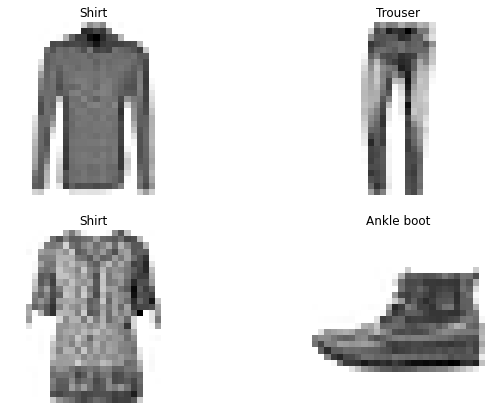

In [19]:
import random
plt.figure(figsize=(10,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data))) 
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [50]:
train_data = train_data / 255.0
test_data = test_data / 255.0

In [51]:
# labels are not one hot encoded -> sparse categorical crossentropy
# labels are encoded -> categorical crossentropy

In [52]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(28,28)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 784)              3136      
 hNormalization)                                                 
                                                                 
 dense_31 (Dense)            (None, 256)               200960    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 128)               32896     
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                      

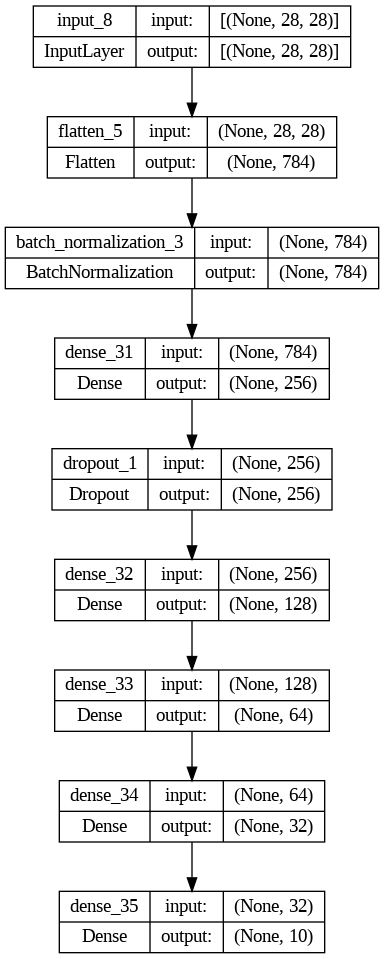

In [54]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [55]:
history = model.fit(train_data, train_labels, epochs=20, validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5082 - accuracy: 0.8158 - val_loss: 0.4110 - val_accuracy: 0.8493
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3951 - accuracy: 0.8564 - val_loss: 0.3834 - val_accuracy: 0.8632
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3611 - accuracy: 0.8687 - val_loss: 0.3486 - val_accuracy: 0.8749
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3364 - accuracy: 0.8768 - val_loss: 0.3537 - val_accuracy: 0.8706
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3191 - accuracy: 0.8812 - val_loss: 0.3411 - val_accuracy: 0.8773
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3053 - accuracy: 0.8884 - val_loss: 0.3279 - val_accuracy: 0.8820
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2939 - accuracy: 0.8913 - val_loss: 0.3317 - val_accuracy

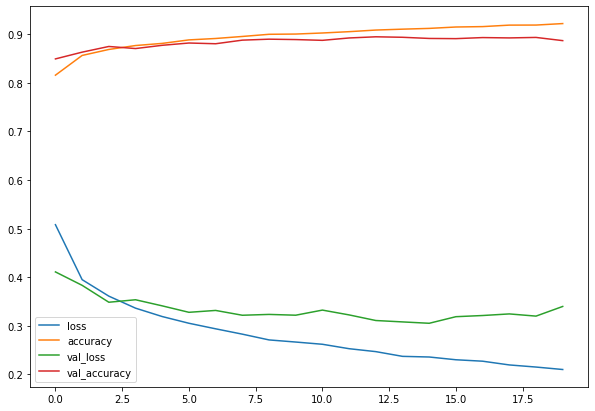

In [57]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.show()

In [62]:
test_pred = model.predict(test_data)

313/313 [==============================] - 1s 2ms/step


In [63]:
test_pred = tf.argmax(test_pred, axis=1)

In [64]:
test_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 8, 1, 5])>

In [65]:
print(classification_report(test_labels, test_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.82      0.77      0.79      1000
           3       0.90      0.91      0.90      1000
           4       0.74      0.89      0.81      1000
           5       0.98      0.96      0.97      1000
           6       0.74      0.66      0.70      1000
           7       0.92      0.97      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.97      0.93      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



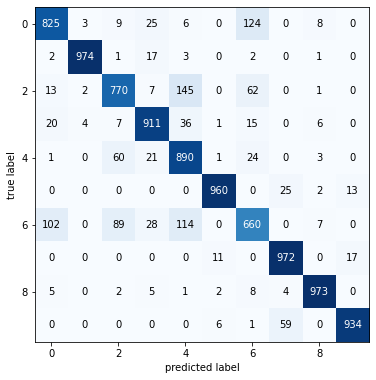

In [68]:
plot_confusion_matrix(confusion_matrix(test_labels, test_pred), figsize=(6,7))
plt.show()

In [75]:
def classifier(image, label):
  prediction = model.predict(image)
  prediction = tf.argmax(prediction, axis=1)[0]
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title(f"True label: {label} | Predicted label: {class_names[prediction]}")
  plt.show()

1/1 [==============================] - 0s 34ms/step


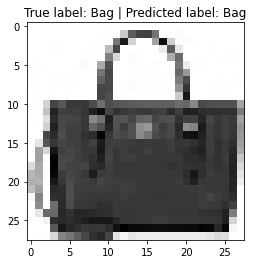

In [77]:
classifier(test_data[69], class_names[test_labels[69]])

In [78]:
# crack open the model
model.layers

In [80]:
weights, biases = model.layers[2].get_weights()

In [81]:
weights, weights.shape

(array([[-0.26528332, -0.13907579, -0.4085502 , ..., -0.17751417,
         -0.21080871, -0.08780021],
        [ 0.4045281 ,  0.20138845,  0.26932734, ...,  0.23611847,
          0.1646623 ,  0.11676771],
        [-0.17415059, -0.1331987 , -0.24129064, ..., -0.32444948,
          0.17675503,  0.19108452],
        ...,
        [-0.09387841, -0.00102722, -0.07341362, ..., -0.00225978,
          0.2276511 , -0.05574978],
        [-0.19984286, -0.19077158,  0.03104244, ...,  0.25907016,
          0.17549053, -0.17741893],
        [ 0.32142177,  0.24995384,  0.38234267, ...,  0.06004377,
          0.14638503,  0.00167611]], dtype=float32), (784, 256))

In [82]:
biases, biases.shape

(array([-0.3147387 , -0.17194702, -0.37888002, -0.3285725 , -0.12549575,
        -0.22379784, -0.17950493, -0.10517713, -0.21788459, -0.20405094,
        -0.1408469 , -0.1648008 , -0.19248244, -0.10466173, -0.2891691 ,
        -0.16029292, -0.18728322, -0.15285368, -0.2799449 , -0.08400112,
        -0.18542488, -0.1985299 , -0.19906366, -0.12216621, -0.31582242,
        -0.19016913, -0.22889715, -0.14129817, -0.18554382, -0.25747994,
        -0.22079556, -0.3553084 , -0.265243  , -0.26305428, -0.17582373,
        -0.17109947, -0.31728828, -0.17774002, -0.11991076, -0.25387368,
        -0.1820221 , -0.20570332, -0.22251786, -0.1836416 , -0.29611182,
        -0.33573028, -0.10989395, -0.26803318, -0.21265131, -0.16419472,
        -0.21253611, -0.2731237 , -0.1780793 , -0.1341109 , -0.21044573,
        -0.22653006, -0.20834914, -0.18329675, -0.18258603, -0.20399733,
        -0.20197897, -0.3344126 , -0.18696953, -0.16080442, -0.20482786,
        -0.16993399, -0.1727951 , -0.19996588, -0.1